# lenet5을 활용한 이미지 학습¶
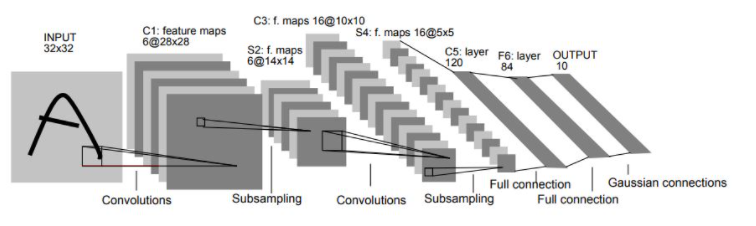
- 위의 모델 구조에 따라서 레이어 구성 
- gray 이미지 데이터인 mnist 사용
- rgb 이미지 데이터인 cifar 사용

In [1]:
!wget -q https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/notMNIST_small.tar.gz
!tar -xzf notMNIST_small.tar.gz

In [12]:
# 이미지 읽어서 데이터 준비하기
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

paths = glob.glob('./notMNIST_small/*/*.png')
paths = np.random.permutation(paths)
독립 = np.array([plt.imread(paths[i]) for i in range(len(paths))])
종속 = np.array([os.path.normpath(paths[i]).split(os.sep)[-2] for i in range(len(paths))])
print(독립.shape, 종속.shape)
print(type(독립), type(종속))

(18724, 28, 28) (18724,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


['D' 'F' 'H' 'F' 'I' 'A' 'I' 'I' 'D' 'I']


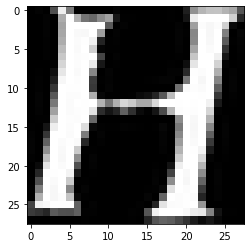

In [26]:
# 데이터가 잘 불러왔는지 확인하기
print(종속[0:10])
plt.imshow(독립[2], cmap='gray')

In [27]:
# 데이터를 준비하고
독립 = 독립.reshape(18724, 28, 28, 1)
종속 = pd.get_dummies(종속) 
print(독립.shape, 종속.shape)
print(type(독립), type(종속))

(18724, 28, 28, 1) (18724, 10)
<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>


In [28]:
import tensorflow as tf

# 모델을 만들고
X = tf.keras.layers.Input(shape=[28, 28, 1])

H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)

H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)              

In [29]:
# 모델을 학습하고
model.fit(독립, 종속, epochs=10)

Epoch 1/10
586/586 [==============================] - 4s 7ms/step - loss: 0.4952 - accuracy: 0.8580
Epoch 2/10
586/586 [==============================] - 4s 7ms/step - loss: 0.2657 - accuracy: 0.9200
Epoch 3/10
586/586 [==============================] - 4s 6ms/step - loss: 0.2059 - accuracy: 0.9375
Epoch 4/10
586/586 [==============================] - 4s 6ms/step - loss: 0.1716 - accuracy: 0.9462
Epoch 5/10
586/586 [==============================] - 3s 6ms/step - loss: 0.1467 - accuracy: 0.9536
Epoch 6/10
586/586 [==============================] - 4s 6ms/step - loss: 0.1229 - accuracy: 0.9607
Epoch 7/10
586/586 [==============================] - 4s 7ms/step - loss: 0.1045 - accuracy: 0.9679
Epoch 8/10
586/586 [==============================] - 4s 7ms/step - loss: 0.0853 - accuracy: 0.9723
Epoch 9/10
586/586 [==============================] - 4s 6ms/step - loss: 0.0723 - accuracy: 0.9761
Epoch 10/10
586/586 [==============================] - 4s 6ms/step - loss: 0.0622 - accuracy: 0.9794

In [30]:
# 모델을 이용합니다. 
pred = model.predict(독립[0:5])
pd.DataFrame(pred).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.00
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.00
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00,0.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.01


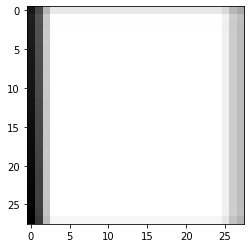

In [39]:
plt.imshow(독립[4], cmap='gray')